In [16]:
#import libraries and modules
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter

#import scikit learn libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#import imbalanced learn libraries for sampling strategies
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

In [17]:
#import the data
data = pd.read_csv("final_wine_data_172k_test.csv")
data.head()

,Unnamed: 0,country,description,price,points,variety,winery
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",15.0,87,Portuguese Red,Quinta dos Avidagos
1,2,US,"Tart and snappy, the flavors of lime flesh and...",14.0,87,Pinot Gris,Rainstorm
2,3,US,"Pineapple rind, lemon pith and orange blossom ...",13.0,87,Riesling,St. Julian
3,4,US,"Much like the regular bottling from 2012, this...",65.0,87,Pinot Noir,Sweet Cheeks
4,5,Spain,Blackberry and raspberry aromas show a typical...,15.0,87,Tempranillo-Merlot,Tandem


In [18]:
#filter just the country and descirption fields
data = data.filter(["country", "description"], axis = 1)
data.head()

,country,description
0,Portugal,"This is ripe and fruity, a wine that is smooth..."
1,US,"Tart and snappy, the flavors of lime flesh and..."
2,US,"Pineapple rind, lemon pith and orange blossom ..."
3,US,"Much like the regular bottling from 2012, this..."
4,Spain,Blackberry and raspberry aromas show a typical...


In [19]:
#look at the unique countries
data['country'].unique()

array(['Portugal', 'US', 'Spain', 'Italy', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', 'Turkey', 'Czech Republic', 'Slovenia', 'Luxembourg',
       'Croatia', 'Georgia', 'Uruguay', 'England', 'Lebanon', 'Serbia',
       'Brazil', 'Moldova', 'Morocco', 'Peru', 'India', 'Bulgaria',
       'Cyprus', 'Armenia', 'Switzerland', 'Bosnia and Herzegovina',
       'Ukraine', 'Slovakia', 'Macedonia', 'China', 'Kosovo', 'Global'],
      dtype=object)

In [20]:
#look at the country balance
data['country'].value_counts()

US                        70956
Italy                     31757
France                    26183
Spain                      8609
Portugal                   6913
Chile                      5284
Argentina                  4567
Austria                    3866
Australia                  3148
Germany                    2917
New Zealand                1935
South Africa               1582
Israel                      689
Greece                      566
Canada                      336
Uruguay                     228
Bulgaria                    202
Hungary                     187
Romania                     143
England                     123
Georgia                     113
Turkey                      107
Moldova                     100
Croatia                      85
Slovenia                     84
Mexico                       73
Brazil                       73
Lebanon                      35
Morocco                      34
Switzerland                  20
Ukraine                      17
Peru    

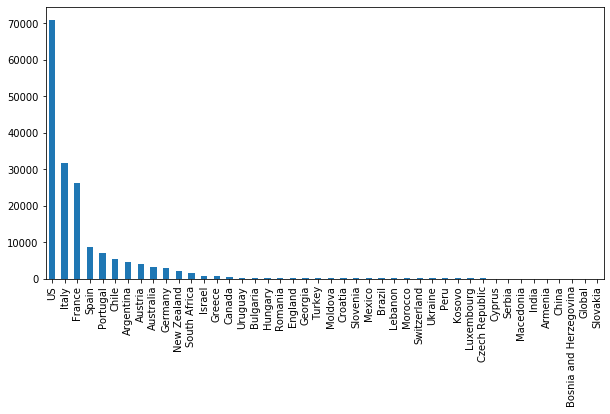

In [22]:
plt.rcParams['figure.figsize'] = [10, 5]
pd.value_counts(data['country']).plot.bar()

In [ ]:
#peek at the description length
data['length'] = data['description'].apply(lambda x: len(x))
data.head()

In [ ]:
#look at the data types
data.dtypes

In [ ]:
# use Counter to get the top 20 wine countries

counter = Counter(data['country'].tolist())
top_countries = {i[0]: idx for idx, i in enumerate(counter.most_common(10))}
top_countries_data = data[data['country'].map(lambda x: x in top_countries)]

top_countries_data['country'].value_counts()

In [ ]:
# filter out all extraneaous columns
df = top_countries_data.filter(["country", "description"], axis = 1)
df.head()

In [ ]:
data = df

In [ ]:
data.head()

In [ ]:
X=data['description']
y=data['country']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Modeling

### Categorical Naive Bayes

In [ ]:
#normal pipleine

In [ ]:
%%time

naive_bayes = make_pipeline_imb(
    CountVectorizer(stop_words='english', binary=True),
    MultinomialNB()
)

naive_bayes.fit(X_train, y_train)

print(f'Accuracy: {naive_bayes.score(X_test, y_test)} \n')
print(classification_report(y_test, naive_bayes.predict(X_test)))

In [ ]:
#undersampling

In [ ]:
%%time

naive_bayes_nearmiss = make_pipeline_imb(
    CountVectorizer(stop_words='english', binary=True),
    NearMiss(),
    MultinomialNB()
)

naive_bayes_nearmiss.fit(X_train, y_train)

print(f'Accuracy: {naive_bayes_nearmiss.score(X_test, y_test)} \n')
print(classification_report_imbalanced(y_test, naive_bayes_nearmiss.predict(X_test)))

In [ ]:
#oversampling

In [ ]:
%%time

naive_bayes_smote = make_pipeline_imb(
    CountVectorizer(stop_words='english', binary=True),
    SMOTE(),
    MultinomialNB()
)

naive_bayes_smote.fit(X_train, y_train)

print(f'Accuracy: {naive_bayes_smote.score(X_test, y_test)} \n')
print(classification_report_imbalanced(y_test, naive_bayes_smote.predict(X_test)))

In [ ]:
print(f"normal Pipeline Score: {naive_bayes.score(X_test, y_test)}")
print(f"SMOTE Pipeline Score: {naive_bayes_smote.score(X_test,y_test)}")
print(f"NearMiss Pipeline Score: {naive_bayes_nearmiss.score(X_test, y_test)}")

### TF-IDF Logistic Regression Model

In [ ]:
#normal

In [ ]:
%%time

# TF-IDF Logistic Regression Model

tfidf_logistic_regression = make_pipeline(
   CountVectorizer(strip_accents='ascii',
                   stop_words='english'),
   TfidfTransformer(),
   LogisticRegression(),
   
   
)

tfidf_logistic_regression.fit(X_train, y_train)

print(f'Accuracy: {tfidf_logistic_regression.score(X_test, y_test)} \n')
print(classification_report(y_test, tfidf_logistic_regression.predict(X_test)))

In [ ]:
#undersampling

In [ ]:
%%time

# TF-IDF Logistic Regression Model

tfidf_logistic_regression_nearmiss = make_pipeline_imb(
   CountVectorizer(strip_accents='ascii',
                   stop_words='english'),
   TfidfTransformer(),
    NearMiss(),
   LogisticRegression(),
   
   
)

tfidf_logistic_regression_nearmiss.fit(X_train, y_train)

print(f'Accuracy: {tfidf_logistic_regression_nearmiss.score(X_test, y_test)} \n')
print(classification_report_imbalanced(y_test, tfidf_logistic_regression_nearmiss.predict(X_test)))

In [ ]:
#oversampling

In [ ]:
%%time

# TF-IDF Logistic Regression Model

tfidf_logistic_regression_smote = make_pipeline_imb(
   CountVectorizer(strip_accents='ascii',
                   stop_words='english'),
   TfidfTransformer(),
    SMOTE(),
   LogisticRegression(),
   
   
)

tfidf_logistic_regression_smote.fit(X_train, y_train)

print(f'Accuracy: {tfidf_logistic_regression_smote.score(X_test, y_test)} \n')
print(classification_report_imbalanced(y_test, tfidf_logistic_regression_smote.predict(X_test)))

In [ ]:
print(f"normal Pipeline Score: {tfidf_logistic_regression.score(X_test, y_test)}")
print(f"SMOTE Pipeline Score: {tfidf_logistic_regression_smote.score(X_test,y_test)}")
print(f"NearMiss Pipeline Score: {tfidf_logistic_regression_nearmiss.score(X_test, y_test)}")

### TF-IDF Linear SVC

In [ ]:
#normal

In [ ]:
%%time

tfidf_svc = make_pipeline(
    CountVectorizer(
        stop_words='english',
    ),
    TfidfTransformer(),
    LinearSVC()
)

tfidf_svc.fit(X_train, y_train)

print(f'Accuracy: {tfidf_svc.score(X_test, y_test)} \n')
print(classification_report(y_test, tfidf_svc.predict(X_test)))

In [ ]:
#undersampling

In [ ]:
%%time

tfidf_svc_nearmiss = make_pipeline_imb(
    CountVectorizer(
        stop_words='english',
    ),
    TfidfTransformer(),
    NearMiss(),
    LinearSVC()
)

tfidf_svc_nearmiss.fit(X_train, y_train)

print(f'Accuracy: {tfidf_svc_nearmiss.score(X_test, y_test)} \n')
print(classification_report_imbalanced(y_test, tfidf_svc_nearmiss.predict(X_test)))

In [ ]:
#oversampling

In [ ]:
%%time

tfidf_svc_smote = make_pipeline_imb(
    CountVectorizer(
        stop_words='english',
    ),
    TfidfTransformer(),
    SMOTE(),
    LinearSVC()
)

tfidf_svc_smote.fit(X_train, y_train)

print(f'Accuracy: {tfidf_svc_smote.score(X_test, y_test)} \n')
print(classification_report_imbalanced(y_test, tfidf_svc_smote.predict(X_test)))

In [ ]:
print(f"normal Pipeline Score: {tfidf_svc.score(X_test, y_test)}")
print(f"SMOTE Pipeline Score: {tfidf_svc_smote.score(X_test,y_test)}")
print(f"NearMiss Pipeline Score: {tfidf_svc_nearmiss.score(X_test, y_test)}")